# Titanic Dataset

### Titanic Case Study
### Perform following actions on dataset:

#### Analyse the data and find out the columns which will not be part of further data analysis and provide the reason why?
#### Find out the data type of each column
#### Find out the number of entries in each column
#### Find out which columns has missing values
#### List the number of missing values in each of the columns
#### Drop those columns which needs to be dropped
#### Replace missing values in each column and provide the reason for choosing one function to replace missing values
#### Find out total number of Male/Female passengers
#### Plot number of Male / Femal passengers in Bar Chart
#### Find out total number of passengers in each passenger class
#### Find out total number of Survived/Not-survived passengers
#### Find out total number of passengers of various age groups (0-30, 31-60 and >60)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic_dataset.csv")

In [3]:
df.head(2)

,pclass,survived,name,Gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


## Analyse the data and find out the columns which will not be part of further data analysis and provide the reason why?

#### Too many missing information in Name, Ticket, Cabin, Body, Home Destination and Boat column. Not required for further analysis

In [4]:
df.drop(["name","ticket","cabin","body","home.dest","boat"],axis=1,inplace=True)


In [5]:
df.head(2)

,pclass,survived,Gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S


## Find out the data type of each column

In [6]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


## Find out the number of entries in each column

In [7]:
df.describe(include="all")

,pclass,survived,Gender,age,sibsp,parch,fare,embarked
count,1309.000000,1309.000000,1309,1046.000000,1309.000000,1309.000000,1308.000000,1307
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,843,NaN,NaN,NaN,NaN,914
mean,2.294882,0.381971,NaN,29.881135,0.498854,0.385027,33.295479,NaN
std,0.837836,0.486055,NaN,14.413500,1.041658,0.865560,51.758668,NaN
min,1.000000,0.000000,NaN,0.166700,0.000000,0.000000,0.000000,NaN
25%,2.000000,0.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN
50%,3.000000,0.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,3.000000,1.000000,NaN,39.000000,1.000000,0.000000,31.275000,NaN


## Find out which column has missing values

In [8]:
df.isnull().any()

pclass      False
survived    False
Gender      False
age          True
sibsp       False
parch       False
fare         True
embarked     True
dtype: bool

## List the number of missing values

In [9]:
df.age.isnull().value_counts()

False    1046
True      263
Name: age, dtype: int64

In [10]:
df.fare.isnull().value_counts()

False    1308
True        1
Name: fare, dtype: int64

In [11]:
df.embarked.isnull().value_counts()

False    1307
True        2
Name: embarked, dtype: int64

# Replace missing values in each column and provide the reason for choosing one function to replace missing values

### Replace values in Age column

In [12]:
df.age = df.age.fillna(df.age.mean()) #Age is continuous data

#### To verify if missing values are replaced or not

In [13]:
df.age.isnull().any()

False

### Replace values in Fare column

In [14]:
df.fare = df.fare.fillna(df.fare.mean()) #Fare is continuous data

#### To verify if missing values are replaced or not

In [15]:
df.fare.isnull().any()

False

### Replace values in Embarked Column

In [16]:
df.embarked.mode()[0] #Embarked column has discrete data. Hence replacing with mode

'S'

In [17]:
df.embarked = df.embarked.fillna(df.embarked.mode()[0])

#### To verify if missing values is replaced or not

In [18]:
df.embarked.isnull().any()

False

### Final Verification for missing / blank entries

In [19]:
df.isnull().any()

pclass      False
survived    False
Gender      False
age         False
sibsp       False
parch       False
fare        False
embarked    False
dtype: bool

### Find out total number of Male and Female passengers

In [20]:
df.Gender.value_counts()

male      843
female    466
Name: Gender, dtype: int64

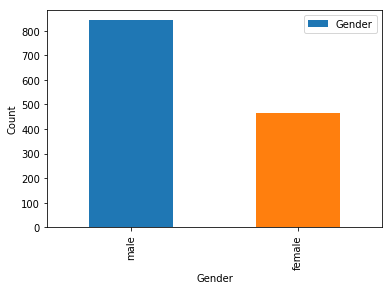

In [21]:
df.Gender.value_counts().plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend()
plt.show()

### Find total number of passengers in each passenger class

In [22]:
df.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

### Find total number of survived and not survived passengers

In [23]:
df.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

### Find and plot total number of passengers of various age groups (0-30, 31-60, 60 and above)

872
404
33


C:\Users\147447\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\147447\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


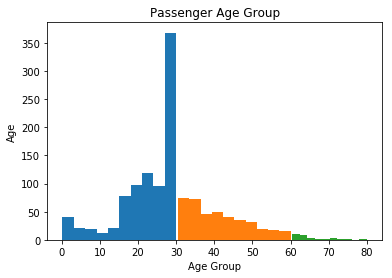

In [24]:
age_grp1 = df.age.where(df.age<=30)
age_grp2 = df.age.where((df.age>30) & (df.age<=60))
age_grp3 = df.age.where(df.age>60)

print(age_grp1.count())
print(age_grp2.count())
print(age_grp3.count())
plt.hist(age_grp1,label="age<=30")
plt.hist(age_grp2,label="age>30 & <=60")
plt.hist(age_grp3,label="age>60")
plt.title("Passenger Age Group")
plt.xlabel("Age Group")
plt.ylabel("Age")
plt.show()

### Find out which age group survived

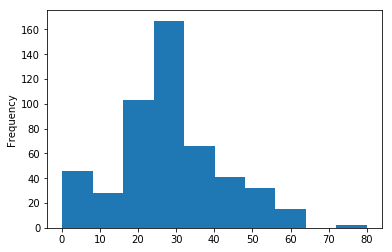

In [25]:
df.where(df.survived==1).age.plot(kind="hist")
plt.show()